In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
df = pd.read_csv("C:/Users/dell/Downloads/creditcard.csv")

In [5]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [8]:
y = df['Class']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [13]:
X_test['Amount'] = scaler.transform(X_test[['Amount']])

In [14]:
cols = X_train.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [15]:
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [16]:
X_test[cols] = pt.transform(X_test)

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [19]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.738459,0.127785,0.157950,0.058263,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.973471,0.974919,0.981385,0.976592,0.003440,1,0.999233,0.999830,0.998963,0.999342,0.000362
1,2.730741,0.532820,0.091429,0.009024,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.970724,0.975700,0.977394,0.974606,0.002831,3,0.999963,0.999980,0.999969,0.999971,0.000007
2,3.268950,0.366325,0.112087,0.003621,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978092,0.970909,0.978186,0.975729,0.003409,2,0.999965,0.999981,0.999955,0.999967,0.000011
3,2.503129,0.182485,0.089197,0.005134,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.951623,0.961704,0.971963,0.961763,0.008304,6,0.999997,0.999998,0.999993,0.999996,0.000002
4,2.911106,0.280064,0.090749,0.006327,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.955499,0.970065,0.978395,0.967986,0.009462,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,2.518866,0.187026,0.100933,0.009953,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.976741,0.969283,0.977365,0.974463,0.003672,4,1.000000,1.000000,1.000000,1.000000,0.000000


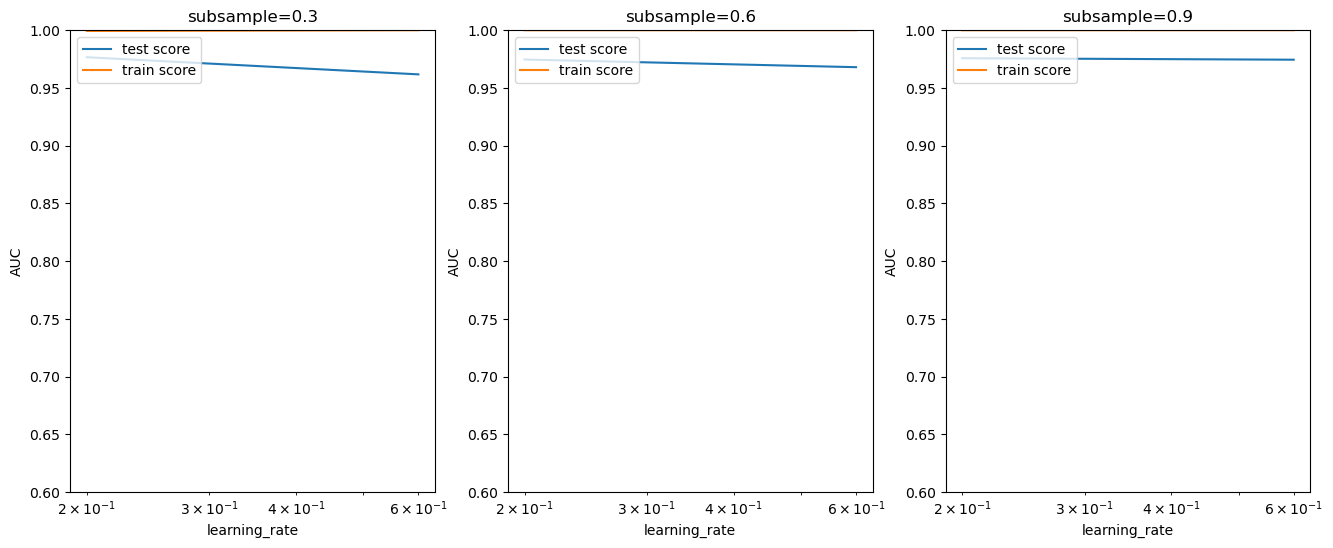

In [20]:
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


In [21]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [22]:
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [23]:
y_train_pred = xgb_imb_model.predict(X_train)
from sklearn import metrics
from sklearn.metrics import f1_score

In [24]:
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227449      0]
 [     0    396]]


In [25]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [26]:
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [29]:
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [30]:
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

In [31]:
y_test_pred = xgb_imb_model.predict(X_test)

In [32]:
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56859     7]
 [   25    71]]


In [33]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [34]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9994382219725431
Sensitivity:- 0.7395833333333334
Specificity:- 0.999876903597932
F1-Score:- 0.8160919540229885


In [35]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.91      0.74      0.82        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [36]:
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [37]:
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9797445969472093

In [38]:
import shap
from lime.lime_tabular import LimeTabularExplainer

In [39]:
!pip install shap

In [40]:
import shap
from lime.lime_tabular import LimeTabularExplainer

In [41]:
!pip install lime

In [42]:
import shap
from lime.lime_tabular import LimeTabularExplainer

In [43]:
explainer = shap.Explainer(xgb_imb_model, X_train)

In [44]:
shap_values = explainer.shap_values(X_test)

100%|===================| 56834/56962 [01:51<00:00]        

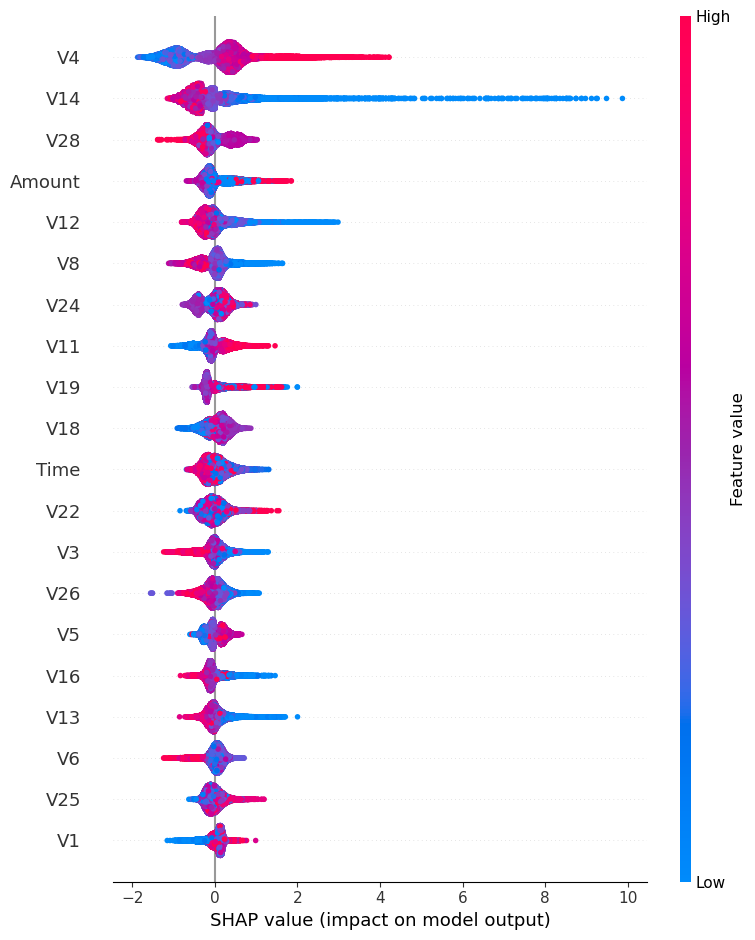

In [45]:
shap.summary_plot(shap_values, X_test, feature_names=cols)

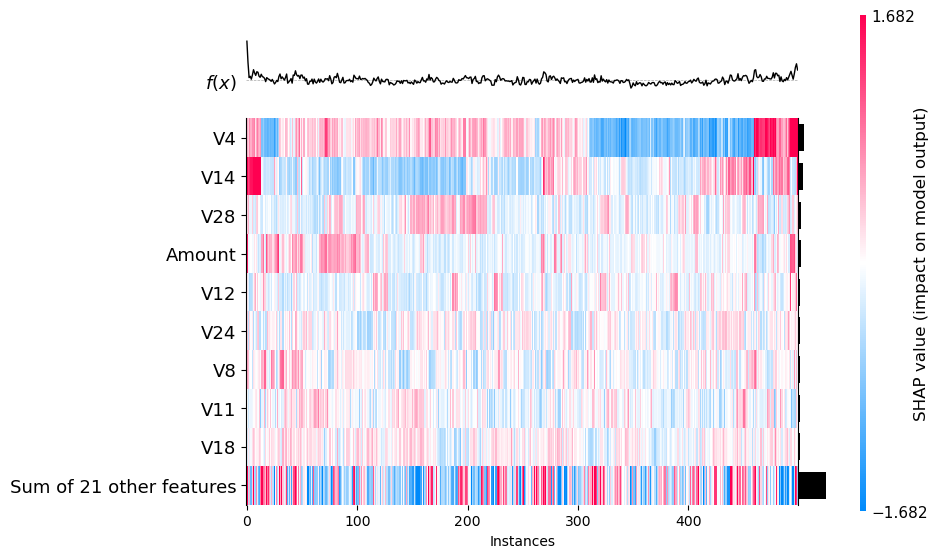

<Axes: xlabel='Instances'>

In [46]:
shap_values = explainer(X_test.iloc[:500])
shap.plots.heatmap(shap_values)

In [47]:
lime_explainer = LimeTabularExplainer(X_train.values, mode="classification", feature_names=cols, class_names=['is_not_fraud','is_fraud'])

In [49]:
instance_idx = 8

# Explain the prediction
explanation = lime_explainer.explain_instance(X_test.values[instance_idx], xgb_imb_model.predict_proba, num_features=len(X_test.columns))

# Visualize the explanation
explanation.show_in_notebook()